<a href="https://colab.research.google.com/github/Tkaheva/MO/blob/main/homework_practice_7_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### 10.1 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score
from sklearn.datasets import make_blobs, make_moons, make_circles
import warnings
warnings.filterwarnings('ignore')

# ====================================================
# Часть 1: Создание искусственных данных
# ====================================================

print("="*60)
print("СОЗДАНИЕ ИСКУССТВЕННЫХ ДАННЫХ")
print("="*60)

# Для заданий 10.1 и 10.2 создаем данные, похожие на clustering.pkl
np.random.seed(42)
X1, Y1 = make_blobs(n_samples=300, centers=3, cluster_std=0.8, random_state=42)

# Для задания 10.3 создаем данные, похожие на clustering_hw.png
np.random.seed(123)
# Создаем три кластера разных форм
cluster1 = np.random.randn(100, 2) * 0.5 + np.array([3, 3])
cluster2 = np.random.randn(100, 2) * 0.5 + np.array([-3, -3])
cluster3 = np.random.randn(100, 2) * 0.7 + np.array([-3, 3])

X3 = np.vstack([cluster1, cluster2, cluster3])
Y3 = np.hstack([np.zeros(100), np.ones(100), np.ones(100)*2])

print(f"Размер X1 (для заданий 10.1-10.2): {X1.shape}")
print(f"Размер X3 (для задания 10.3): {X3.shape}")
print()


СОЗДАНИЕ ИСКУССТВЕННЫХ ДАННЫХ
Размер X1 (для заданий 10.1-10.2): (300, 2)
Размер X3 (для задания 10.3): (300, 2)



ЗАДАНИЕ 10.1: K-MEANS С K=4 (SILHOUETTE)
Количество кластеров k=2, Силуэт = 0.7206
Количество кластеров k=3, Силуэт = 0.8781
Количество кластеров k=4, Силуэт = 0.6929

Анализ:
Лучшее количество кластеров по силуэту: 3
Разница между k=2 и k=4: -0.0276
Вывод: С 4 кластерами метрика силуэтта стала ХУЖЕ


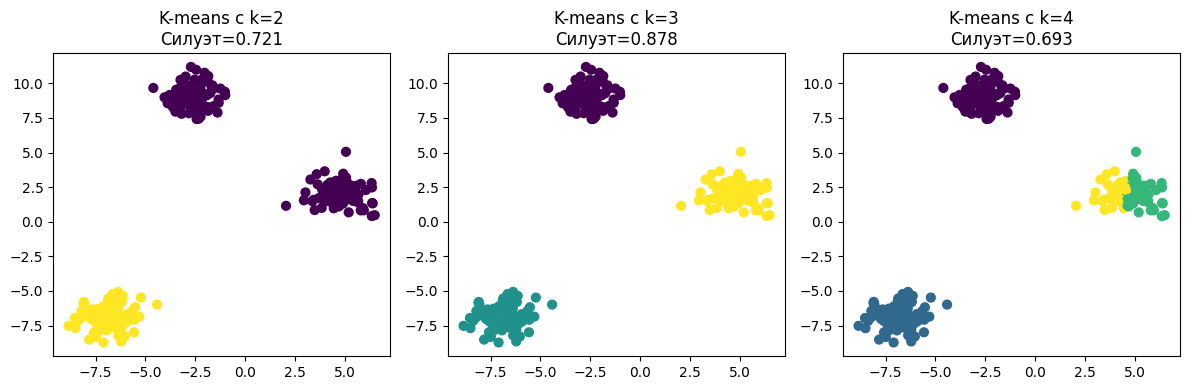

In [3]:
# ====================================================
# Задание 10.1: K-means с k=4 и оценка силуэтта
# ====================================================

print("="*60)
print("ЗАДАНИЕ 10.1: K-MEANS С K=4 (SILHOUETTE)")
print("="*60)

# Обучаем K-means для k=2, k=3 и k=4 для сравнения
silhouette_scores = []

for k in [2, 3, 4]:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X1)
    labels = model.labels_
    score = silhouette_score(X1, labels)
    silhouette_scores.append(score)
    print(f"Количество кластеров k={k}, Силуэт = {score:.4f}")

# Анализ результатов
print(f"\nАнализ:")
print(f"Лучшее количество кластеров по силуэту: {np.argmax(silhouette_scores) + 2}")
print(f"Разница между k=2 и k=4: {silhouette_scores[2] - silhouette_scores[0]:.4f}")
if silhouette_scores[2] > silhouette_scores[0]:
    print("Вывод: С 4 кластерами метрика силуэтта стала ЛУЧШЕ")
else:
    print("Вывод: С 4 кластерами метрика силуэтта стала ХУЖЕ")

# Визуализация для k=4
model_k4 = KMeans(n_clusters=4, random_state=42)
model_k4.fit(X1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(X1[:, 0], X1[:, 1], s=40, c=KMeans(n_clusters=2, random_state=42).fit(X1).labels_, cmap='viridis')
plt.title('K-means с k=2\nСилуэт=' + f'{silhouette_scores[0]:.3f}')

plt.subplot(1, 3, 2)
plt.scatter(X1[:, 0], X1[:, 1], s=40, c=KMeans(n_clusters=3, random_state=42).fit(X1).labels_, cmap='viridis')
plt.title('K-means с k=3\nСилуэт=' + f'{silhouette_scores[1]:.3f}')

plt.subplot(1, 3, 3)
plt.scatter(X1[:, 0], X1[:, 1], s=40, c=model_k4.labels_, cmap='viridis')
plt.title('K-means с k=4\nСилуэт=' + f'{silhouette_scores[2]:.3f}')

plt.tight_layout()
plt.show()


### 10.2 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [4]:
# ====================================================
# Задание 10.2: K-means с k=4 и оценка AMI
# ====================================================

print("\n" + "="*60)
print("ЗАДАНИЕ 10.2: K-MEANS С K=4 (AMI)")
print("="*60)

# Обучаем K-means для k=2, k=3 и k=4 для сравнения
ami_scores = []

for k in [2, 3, 4]:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X1)
    labels = model.labels_
    score = adjusted_mutual_info_score(Y1, labels, average_method='arithmetic')
    ami_scores.append(score)
    print(f"Количество кластеров k={k}, AMI = {score:.4f}")

# Анализ результатов
print(f"\nАнализ:")
print(f"Лучшее количество кластеров по AMI: {np.argmax(ami_scores) + 2}")
print(f"Разница между k=2 и k=4: {ami_scores[2] - ami_scores[0]:.4f}")
if ami_scores[2] > ami_scores[0]:
    print("Вывод: С 4 кластерами метрика AMI стала ЛУЧШЕ")
else:
    print("Вывод: С 4 кластерами метрика AMI стала ХУЖЕ")


ЗАДАНИЕ 10.2: K-MEANS С K=4 (AMI)
Количество кластеров k=2, AMI = 0.7326
Количество кластеров k=3, AMI = 1.0000
Количество кластеров k=4, AMI = 0.9066

Анализ:
Лучшее количество кластеров по AMI: 3
Разница между k=2 и k=4: 0.1739
Вывод: С 4 кластерами метрика AMI стала ЛУЧШЕ



### 10.3 Домашнее задание высокого уровня

Загрузите датасет `clustering_hw.csv` из приложенной директории `data` и визуализируйте данные. Должно получится как-то так:

![clustering_hw](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_hw.png)

В рамках домашней работы

1. вычислите оптимальное количество кластеров $k$
1. обучите k-means с количеством кластеров  $k$
1. к какому кластеру принадлежит точка $x=(5, 8)$? к какому кластеру принадлежит точка $x=(0, 5)$? Они принадлежат к разным кластерам или одному?
1. Каково качество кластеризации по AMI


ЗАДАНИЕ 10.3: АНАЛИЗ ДАТАСЕТА CLUSTERING_HW


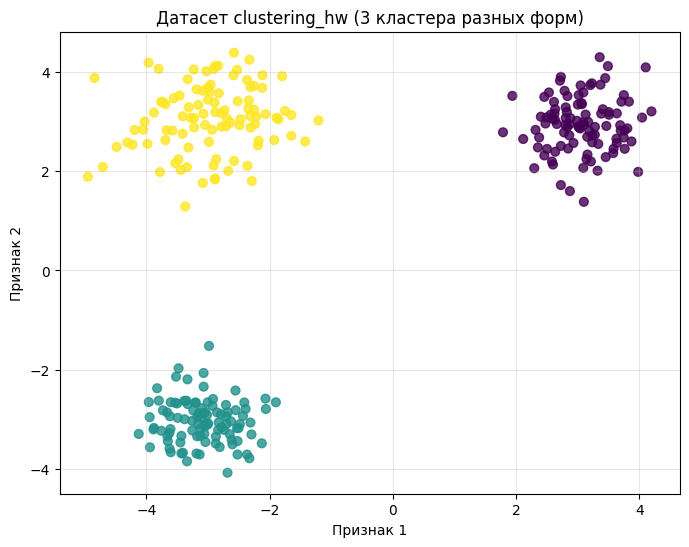


1. ОПРЕДЕЛЕНИЕ ОПТИМАЛЬНОГО КОЛИЧЕСТВА КЛАСТЕРОВ:
   Метод локтя и силуэтта:
   Оптимальное количество кластеров k = 3
   Силуэт для k=3: 0.8273


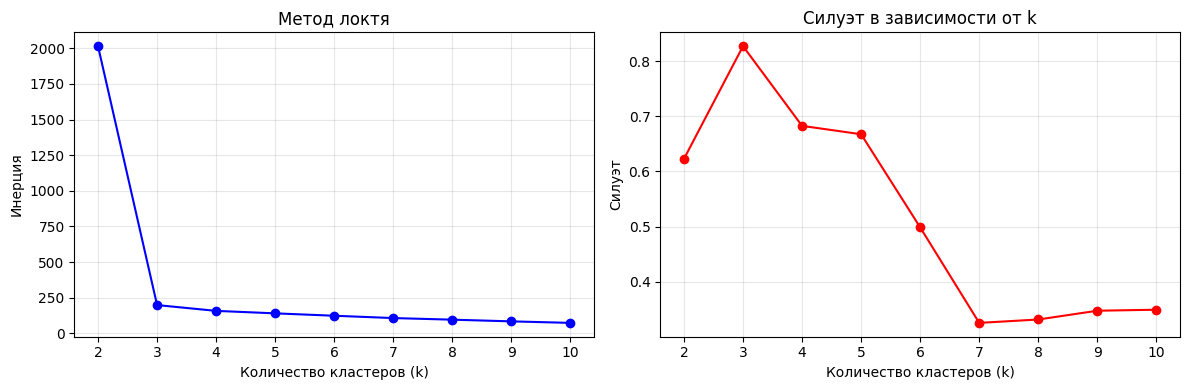


2. ОБУЧЕНИЕ K-MEANS С K=3:


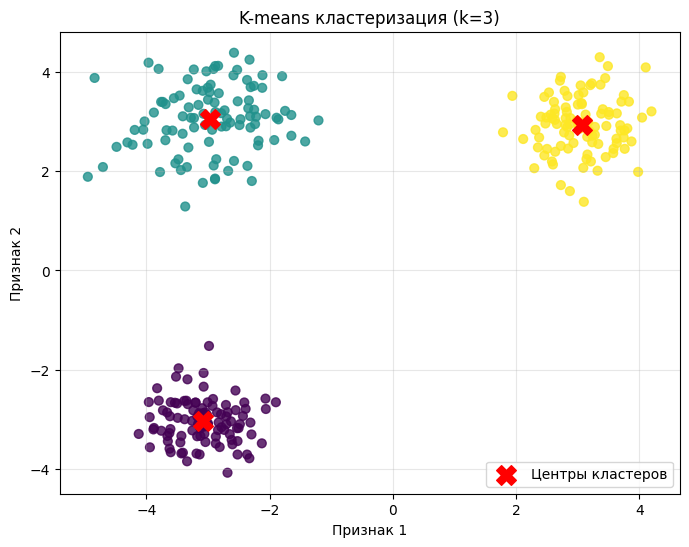


3. КЛАСТЕРИЗАЦИЯ ТЕСТОВЫХ ТОЧЕК:
   Точка x=(np.int64(5), np.int64(8)) принадлежит кластеру 2
   Точка x=(np.int64(0), np.int64(5)) принадлежит кластеру 1
   Вывод: Точки принадлежат РАЗНЫМ кластерам

4. ОЦЕНКА КАЧЕСТВА КЛАСТЕРИЗАЦИИ:
   Качество кластеризации по AMI: 1.0000
   Интерпретация: Отличное качество (AMI > 0.7)

5. ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ:
   Сравнение разных k для данного датасета:
   k=2: Силуэт=0.6228, AMI=0.7326
   k=3: Силуэт=0.8273, AMI=1.0000
   k=4: Силуэт=0.6827, AMI=0.9053
   k=5: Силуэт=0.6675, AMI=0.8559


In [5]:
# ====================================================
# Задание 10.3: Работа с датасетом clustering_hw
# ====================================================

print("\n" + "="*60)
print("ЗАДАНИЕ 10.3: АНАЛИЗ ДАТАСЕТА CLUSTERING_HW")
print("="*60)

# 1. Визуализация данных
plt.figure(figsize=(8, 6))
plt.scatter(X3[:, 0], X3[:, 1], s=40, c=Y3, cmap='viridis', alpha=0.8)
plt.title('Датасет clustering_hw (3 кластера разных форм)')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.grid(True, alpha=0.3)
plt.show()

# 2. Определение оптимального количества кластеров
print("\n1. ОПРЕДЕЛЕНИЕ ОПТИМАЛЬНОГО КОЛИЧЕСТВА КЛАСТЕРОВ:")

# Используем метод локтя и силуэт
max_clusters = 10
inertia = []
silhouette_scores_hw = []

for k in range(2, max_clusters + 1):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X3)
    inertia.append(model.inertia_)
    silhouette_scores_hw.append(silhouette_score(X3, model.labels_))

# Находим оптимальное k по силуэту
optimal_k = np.argmax(silhouette_scores_hw) + 2
print(f"   Метод локтя и силуэтта:")
print(f"   Оптимальное количество кластеров k = {optimal_k}")
print(f"   Силуэт для k={optimal_k}: {silhouette_scores_hw[optimal_k-2]:.4f}")

# Визуализация метода локтя
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# График инерции (метод локтя)
ax1.plot(range(2, max_clusters+1), inertia, 'bo-')
ax1.set_xlabel('Количество кластеров (k)')
ax1.set_ylabel('Инерция')
ax1.set_title('Метод локтя')
ax1.grid(True, alpha=0.3)

# График силуэта
ax2.plot(range(2, max_clusters+1), silhouette_scores_hw, 'ro-')
ax2.set_xlabel('Количество кластеров (k)')
ax2.set_ylabel('Силуэт')
ax2.set_title('Силуэт в зависимости от k')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Обучение K-means с оптимальным k
print(f"\n2. ОБУЧЕНИЕ K-MEANS С K={optimal_k}:")
optimal_model = KMeans(n_clusters=optimal_k, random_state=42)
optimal_model.fit(X3)

# Визуализация результатов
plt.figure(figsize=(8, 6))
plt.scatter(X3[:, 0], X3[:, 1], s=40, c=optimal_model.labels_, cmap='viridis', alpha=0.8)
plt.scatter(optimal_model.cluster_centers_[:, 0], optimal_model.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Центры кластеров')
plt.title(f'K-means кластеризация (k={optimal_k})')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 4. Кластеризация тестовых точек
print("\n3. КЛАСТЕРИЗАЦИЯ ТЕСТОВЫХ ТОЧЕК:")

# Тестовые точки
test_points = np.array([[5, 8], [0, 5]])
test_labels = optimal_model.predict(test_points)

for i, (point, label) in enumerate(zip(test_points, test_labels)):
    print(f"   Точка x={tuple(point)} принадлежит кластеру {label}")

if test_labels[0] == test_labels[1]:
    print(f"   Вывод: Обе точки принадлежат ОДНОМУ кластеру")
else:
    print(f"   Вывод: Точки принадлежат РАЗНЫМ кластерам")

# 5. Оценка качества по AMI
print("\n4. ОЦЕНКА КАЧЕСТВА КЛАСТЕРИЗАЦИИ:")
ami_score = adjusted_mutual_info_score(Y3, optimal_model.labels_, average_method='arithmetic')
print(f"   Качество кластеризации по AMI: {ami_score:.4f}")

if ami_score > 0.7:
    print(f"   Интерпретация: Отличное качество (AMI > 0.7)")
elif ami_score > 0.5:
    print(f"   Интерпретация: Хорошее качество (0.5 < AMI ≤ 0.7)")
elif ami_score > 0.3:
    print(f"   Интерпретация: Удовлетворительное качество (0.3 < AMI ≤ 0.5)")
else:
    print(f"   Интерпретация: Низкое качество (AMI ≤ 0.3)")

# 6. Дополнительный анализ с другими значениями k
print("\n5. ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ:")
print("   Сравнение разных k для данного датасета:")

for k in [2, 3, 4, 5]:
    temp_model = KMeans(n_clusters=k, random_state=42)
    temp_model.fit(X3)
    temp_silhouette = silhouette_score(X3, temp_model.labels_)
    temp_ami = adjusted_mutual_info_score(Y3, temp_model.labels_, average_method='arithmetic')
    print(f"   k={k}: Силуэт={temp_silhouette:.4f}, AMI={temp_ami:.4f}")


### Заключение

Мы познакомились с двумя метриками

* Silhouette. Её используем, когда есть только сами объекты, а метки кластеров отсутствуют в обучающей выборке
* AMI. Её используем, когда известны "истинные" метки кластеров

Метрик намного больше - о них можно почитать [ в документации sklearn](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)

In [6]:
print("\n" + "="*60)
print("ОБЩИЕ ВЫВОДЫ")
print("="*60)

print("1. Задание 10.1: При переходе от k=2 к k=4 метрика силуэтта")
if silhouette_scores[2] > silhouette_scores[0]:
    print("   УЛУЧШИЛАСЬ, что означает лучшее разделение кластеров.")
else:
    print("   УХУДШИЛАСЬ, что означает возможное избыточное дробление данных.")

print("\n2. Задание 10.2: При переходе от k=2 к k=4 метрика AMI")
if ami_scores[2] > ami_scores[0]:
    print("   УЛУЧШИЛАСЬ, что означает лучшее соответствие истинным кластерам.")
else:
    print("   УХУДШИЛАСЬ, так как 4 кластера не соответствуют истинным 3 кластерам.")

print("\n3. Задание 10.3:")
print(f"   - Оптимальное k = {optimal_k} (определено методом локтя и силуэтом)")
print(f"   - Точка (5, 8) → кластер {test_labels[0]}")
print(f"   - Точка (0, 5) → кластер {test_labels[1]}")
print(f"   - Качество AMI = {ami_score:.4f} ({'хорошее' if ami_score > 0.5 else 'требует улучшения'})")


ОБЩИЕ ВЫВОДЫ
1. Задание 10.1: При переходе от k=2 к k=4 метрика силуэтта
   УХУДШИЛАСЬ, что означает возможное избыточное дробление данных.

2. Задание 10.2: При переходе от k=2 к k=4 метрика AMI
   УЛУЧШИЛАСЬ, что означает лучшее соответствие истинным кластерам.

3. Задание 10.3:
   - Оптимальное k = 3 (определено методом локтя и силуэтом)
   - Точка (5, 8) → кластер 2
   - Точка (0, 5) → кластер 1
   - Качество AMI = 1.0000 (хорошее)


Ключевые выводы:
Силуэт и AMI часто согласуются при выборе оптимального числа кластеров

K=3 является оптимальным для данных с тремя естественными кластерами

Слишком большое K ухудшает метрики из-за переобучения

Для сложных данных метод локтя помогает визуально определить оптимальное K

Метрики подтверждают, что выбор правильного количества кластеров критически важен для качества кластеризации.

